In [125]:
import os
import re

import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import torch
import tifffile
import torchvision.transforms.functional as TF

In [126]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
%autoreload 2

In [128]:
import mushroom.data.cosmx as cosmx
import mushroom.utils as utils

In [129]:
cosmx_dir = '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1'

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


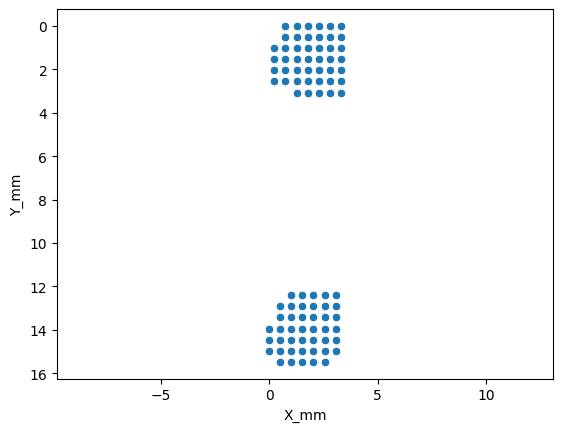

In [132]:
cosmx.display_fovs(cosmx_dir)

In [133]:
scaler = .1
sample_to_bbox = {
    'HT413C1-Th1K4A1Us34_1': (0, 5, 0, 5), # top, bottom, left, right
    'HT413C1-Th1K4A1Us7_1': (11, 16, 0, 5),
}

In [286]:
sample_to_adata = cosmx.adata_from_cosmx(cosmx_dir, sample_to_bbox=sample_to_bbox, scaler=scaler)

start
{1: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/20240112_213110_S3/CellStatsDir/Morphology2D/20240112_213110_S3_C902_P99_N99_F001.TIF', 2: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/20240112_213110_S3/CellStatsDir/Morphology2D/20240112_213110_S3_C902_P99_N99_F002.TIF', 3: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/20240112_213110_S3/CellStatsDir/Morphology2D/20240112_213110_S3_C902_P99_N99_F003.TIF', 4: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/20240112_213110_S3/CellStatsDir/Morphology2D/20240112_213110_S3_C902_P99_N99_F004.TIF', 5: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/20240112_213110_S3/CellStatsDir/Morphology2D/20240112_213110_S3_C902_P99_N99_F005.TIF', 6: '/diskmnt/primary/CosMx/data/HT413C1-Th1K4A1Us34_1___HT413C1-Th1K4A1Us7_1/5413C1Th1k4A1/2024011

here
HT413C1-Th1K4A1Us34_1
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
HT413C1-Th1K4A1Us7_1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


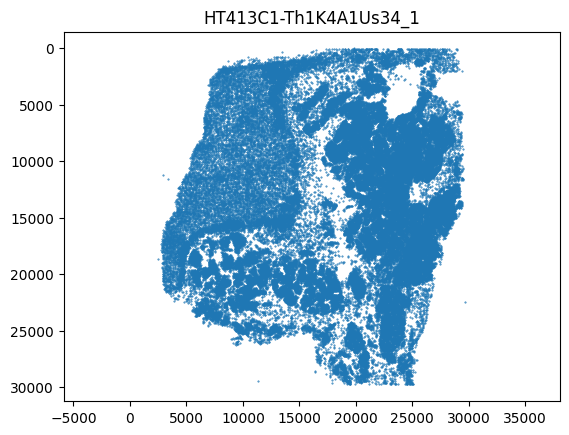

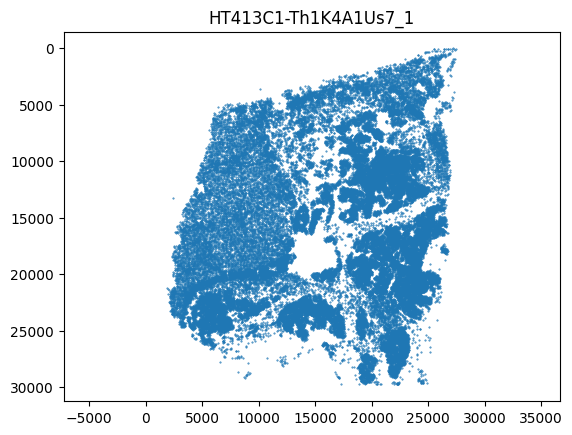

In [287]:
for sid, adata in sample_to_adata.items():
    plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=.2)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(sid)
    plt.show()

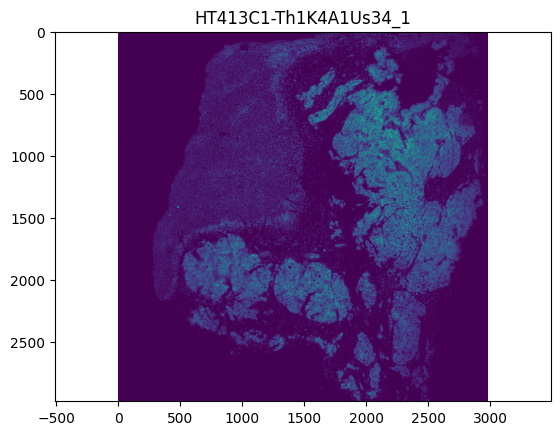

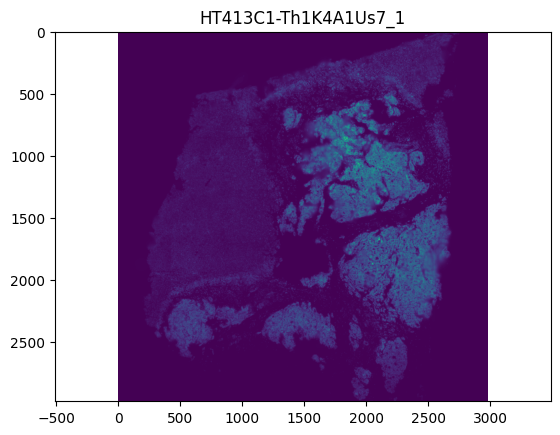

In [288]:
for sid, adata in sample_to_adata.items():
    img = next(iter(adata.uns['spatial'].values()))['images']['hires']
    plt.imshow(img)
    plt.axis('equal')
    plt.title(sid)
    plt.show()